In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

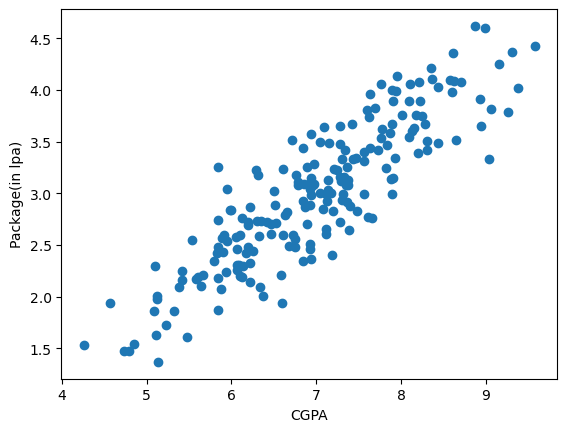

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [5]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [6]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train,y_train)

LinearRegression()

In [11]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [12]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [13]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

C:\Users\vinay\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0, 0.5, 'Package(in lpa)')

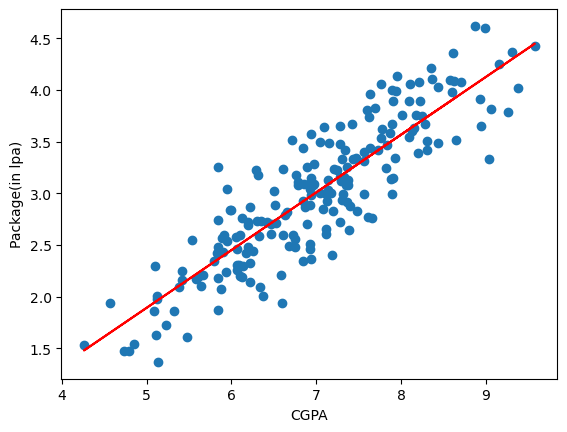

In [14]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [15]:
m = lr.coef_

In [16]:
m

array([0.55795197])

In [17]:
b = lr.intercept_

In [18]:
b

-0.8961119222429144

In [19]:
# y = mx + b

m * 8.58 + b

array([3.89111601])

In [20]:
m * 9.5 + b

array([4.40443183])

In [21]:
m * 100 + b

array([54.89908542])

# Regression Metrics

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [23]:
y_pred = lr.predict(X_test)

In [24]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [25]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [26]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [28]:
print("R2 Score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 Score 0.780730147510384


In [29]:
# Adjusted R2 score
X_test.shape


(40, 1)

In [30]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

**adding irrevalant column then testing r2 score and adjusted r2 score**

In [32]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.708589,3.26
1,5.12,0.745180,1.98
2,7.82,0.476408,3.25
3,7.42,0.227223,3.67
4,6.94,0.382096,3.57


Text(0, 0.5, 'Package(in lpa)')

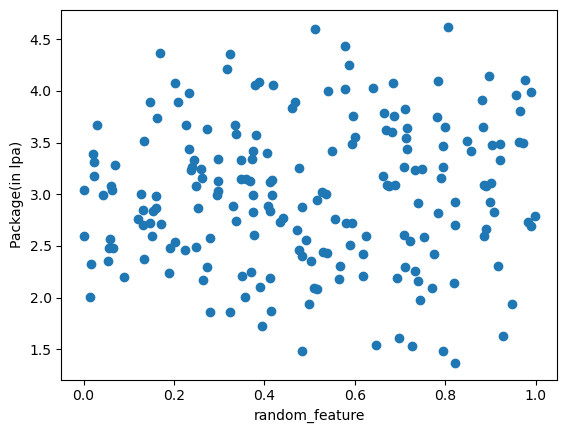

In [33]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [34]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [36]:
lr = LinearRegression()

In [37]:
lr.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred = lr.predict(X_test)

In [39]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.780575623182554


In [40]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7687148460572867

**adding revelant column(Linear relatiion between new column and target column)**

In [41]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

Text(0, 0.5, 'Package(in lpa)')

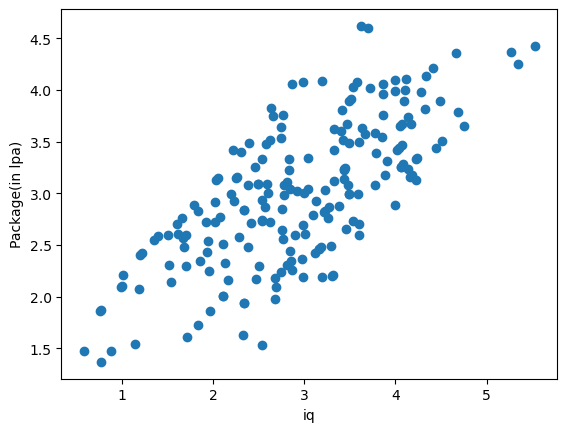

In [42]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [43]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [45]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [46]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8305366616046452


In [47]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8213764811508423